In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('NYPD_Arrest_Data__Year_to_Date_.csv')
df

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,238013474,12/18/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,Q,105,97,18-24,M,BLACK,1057636,203954,40.726187,-73.735234,POINT (-73.73523390399998 40.72618713000002)
1,236943583,11/25/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501500,F,K,69,71,25-44,M,BLACK,1014340,171320,40.636868,-73.891586,POINT (-73.89158591899997 40.63686750900007)
2,234938876,10/14/2021,594.0,OBSCENITY 1,116.0,SEX CRIMES,PL 2631100,F,K,61,0,25-44,M,WHITE,995244,155739,40.594145,-73.960415,POINT (-73.96041495199995 40.59414516900005)
3,234788259,10/11/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501001,F,B,42,71,18-24,M,BLACK,1009058,239616,40.824340,-73.910365,POINT (-73.91036538099996 40.82433953100008)
4,234188790,09/28/2021,578.0,NaN,NaN,NaN,PL 2223001,M,B,44,0,25-44,M,BLACK,1005169,246667,40.843703,-73.924395,POINT (-73.92439508899997 40.84370255600004)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155502,222884924,01/10/2021,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,B,46,0,45-64,M,BLACK,1011432,247605,40.846260,-73.901755,POINT (-73.90175529499999 40.846260031000035)
155503,223918625,02/03/2021,792.0,WEAPONS POSSESSION 1 & 2,118.0,DANGEROUS WEAPONS,PL 2650303,F,K,67,0,18-24,M,BLACK,1004940,180941,40.663302,-73.925425,POINT (-73.92542497899994 40.66330200400005)
155504,224323770,02/13/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,S,121,0,45-64,M,BLACK,942825,166367,40.623227,-74.149227,POINT (-74.14922697299994 40.623226819000074)
155505,222599533,01/04/2021,792.0,WEAPONS POSSESSION 1 & 2,118.0,DANGEROUS WEAPONS,PL 2650303,F,K,73,0,25-44,M,BLACK,1007524,188555,40.684194,-73.916085,POINT (-73.91608474599997 40.684194302000044)


In [3]:
# Dropped unwanted columns below#

In [9]:
df=df.drop(['PD_CD','ARREST_PRECINCT','JURISDICTION_CODE','X_COORD_CD','Y_COORD_CD','Latitude','Longitude','New Georeferenced Column'], axis=1)

In [5]:
# Wanted to see how many different offense where in database. 62 total

In [10]:
df.groupby(['OFNS_DESC']).count()

,ARREST_KEY,ARREST_DATE,PD_DESC,KY_CD,LAW_CODE,LAW_CAT_CD,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE
OFNS_DESC,,,,,,,,,,
ADMINISTRATIVE CODE,86,86,86,86,86,86,86,86,86,86
ADMINISTRATIVE CODES,2,2,2,2,2,2,2,2,2,2
AGRICULTURE & MRKTS LAW-UNCLASSIFIED,72,72,72,72,72,72,72,72,72,72
ALCOHOLIC BEVERAGE CONTROL LAW,313,313,313,313,313,313,313,313,313,313
ANTICIPATORY OFFENSES,64,64,64,64,64,64,64,64,64,64
...,...,...,...,...,...,...,...,...,...,...
SEX CRIMES,3586,3586,3586,3586,3586,3586,3586,3586,3586,3586
THEFT OF SERVICES,190,190,190,190,190,190,190,190,190,190
THEFT-FRAUD,225,225,225,225,225,225,225,225,225,225


In [ ]:
#What race had the most arrest? Black and Balck Hispanic

In [11]:
df.groupby(['PERP_RACE'])['ARREST_BORO'].count()

PERP_RACE
AMERICAN INDIAN/ALASKAN NATIVE      443
ASIAN / PACIFIC ISLANDER           8593
BLACK                             77133
BLACK HISPANIC                    13576
UNKNOWN                             587
WHITE                             17063
WHITE HISPANIC                    38112
Name: ARREST_BORO, dtype: int64

In [12]:
df.dtypes

ARREST_KEY       int64
ARREST_DATE     object
PD_DESC         object
KY_CD          float64
OFNS_DESC       object
LAW_CODE        object
LAW_CAT_CD      object
ARREST_BORO     object
AGE_GROUP       object
PERP_SEX        object
PERP_RACE       object
dtype: object

In [13]:
df.isnull().sum()

ARREST_KEY        0
ARREST_DATE       0
PD_DESC         103
KY_CD           103
OFNS_DESC       103
LAW_CODE          0
LAW_CAT_CD     1393
ARREST_BORO       0
AGE_GROUP         0
PERP_SEX          0
PERP_RACE         0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155507 entries, 0 to 155506
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ARREST_KEY   155507 non-null  int64  
 1   ARREST_DATE  155507 non-null  object 
 2   PD_DESC      155404 non-null  object 
 3   KY_CD        155404 non-null  float64
 4   OFNS_DESC    155404 non-null  object 
 5   LAW_CODE     155507 non-null  object 
 6   LAW_CAT_CD   154114 non-null  object 
 7   ARREST_BORO  155507 non-null  object 
 8   AGE_GROUP    155507 non-null  object 
 9   PERP_SEX     155507 non-null  object 
 10  PERP_RACE    155507 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 13.1+ MB


In [ ]:
#Drop rows with null values

In [15]:
df=df.dropna(0)

In [16]:
df

,ARREST_KEY,ARREST_DATE,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE
0,238013474,12/18/2021,RAPE 1,104.0,RAPE,PL 1303501,F,Q,18-24,M,BLACK
1,236943583,11/25/2021,"ARSON 2,3,4",114.0,ARSON,PL 1501500,F,K,25-44,M,BLACK
2,234938876,10/14/2021,OBSCENITY 1,116.0,SEX CRIMES,PL 2631100,F,K,25-44,M,WHITE
3,234788259,10/11/2021,"ARSON 2,3,4",114.0,ARSON,PL 1501001,F,B,18-24,M,BLACK
5,234117071,09/27/2021,RAPE 1,104.0,RAPE,PL 1303501,F,K,25-44,M,BLACK
...,...,...,...,...,...,...,...,...,...,...,...
155502,222884924,01/10/2021,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,B,45-64,M,BLACK
155503,223918625,02/03/2021,WEAPONS POSSESSION 1 & 2,118.0,DANGEROUS WEAPONS,PL 2650303,F,K,18-24,M,BLACK
155504,224323770,02/13/2021,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,S,45-64,M,BLACK
155505,222599533,01/04/2021,WEAPONS POSSESSION 1 & 2,118.0,DANGEROUS WEAPONS,PL 2650303,F,K,25-44,M,BLACK


In [ ]:
#Who were arrested more men or women? Data shows men by nearly 6x more

In [19]:
df.groupby(['PERP_SEX'])['OFNS_DESC'].count()

PERP_SEX
F     26447
M    127564
Name: OFNS_DESC, dtype: int64

In [ ]:
# which Boro had the more arrest? King County - Brooklyn

<AxesSubplot:xlabel='ARREST_BORO'>

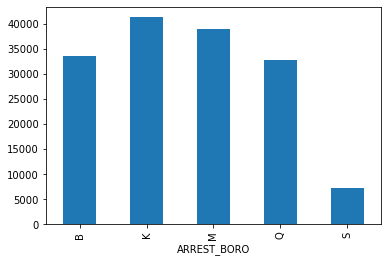

In [20]:
df.groupby(['ARREST_BORO'])['OFNS_DESC'].count().plot(kind="bar")

In [21]:
grouped_df = df.groupby('OFNS_DESC')


In [22]:
df1= grouped_df.get_group('RAPE')

<AxesSubplot:xlabel='PERP_RACE'>

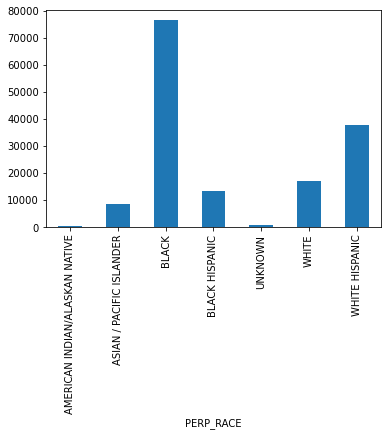

In [23]:
df.groupby(['PERP_RACE'])['OFNS_DESC'].count().plot(kind="bar")

In [ ]:
#Grouped by Boro and Offense rape from df1 groupby. Showing Bronx has the most Rape offenses

In [25]:
df1.groupby(['ARREST_BORO'])['OFNS_DESC'].count()

ARREST_BORO
B    169
K    155
M    105
Q    148
S     29
Name: OFNS_DESC, dtype: int64

<AxesSubplot:xlabel='PERP_RACE'>

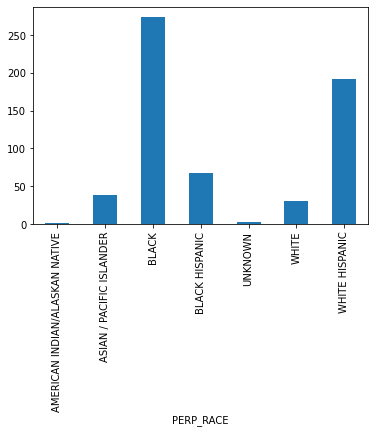

In [26]:
df1.groupby(['PERP_RACE'])['OFNS_DESC'].count().plot(kind="bar")

In [ ]:
#grouped by age group to see the range for Rape offenses and ranges highest 25-44.

In [27]:
df1.groupby(['AGE_GROUP'])['PERP_RACE'].count()

AGE_GROUP
18-24    107
25-44    344
45-64    114
65+       13
<18       28
Name: PERP_RACE, dtype: int64

In [ ]:
#In conclusion the data shows that mostly men in NY are arrested and mainly black males between 25-44